**Este notebook puede carecer de tildes debido que la distribucion de mi teclado es estadounidense (en-US). Lamento las moletias.**

# Manejo y unificacion de diferentes bases de datos

La empresa The best Company dedicada a producir repuestos automovilísticos conoce que la baja productividad de sus colaboradores esta dada en gran medida por los ausentismos a las jornadas laborales.  
Teniendo en cuenta lo anterior le solicita apoyo a usted para poder evaluar esta situación y le comparte las siguientes 5 bases de datos.  
* `Ausentismo.xlsx`: Esta cuenta con la información de las horas de ausentismo por mes y por colaborador desde enero del 2017 a junio de 2018.
* `Codigo_Cargo.txt`: Es una base de datos de homologación para identificar el nombre del cargo colaborador, junto con el código del cargo.
* `Colaboradores.csv`:  Dentro de ella se encuentran el id del colaborador, el código del cargo, el área y el periodo en el que se registra la información, ya que puede que el colaborador rote entre áreas en los diferentes meses.
* `Número_Horas_Contratadas1.csv`: Cuenta con el número de horas contratadas por mes para cada colaborador en algunos meses.
* `Número_Horas_Contratadas2.csv`: Aquí se registra el número de horas contratadas por mes para cada colaborador en algunos meses. Esta base cuenta con información de meses distinta a Número_Horas_Contratadas1.  

La idea general del ejercicio es unificar las bases de datos aca mencionadas, de tal manera que se use la base `Colaboradores.csv` como base del ejercicio. Al final se obtendra una base en cual es posible relacionar el ID del empleado, el codigo de su cargo, la descripcion de su cargo, junto con las horas totales trabajas y no trabajadas en un cierto periodo de tiempo. 

In [4]:
#Libreria necesaria para el manejo de bases de datos
import pandas as pd

## Trabajando con `Ausentismo.xlsx`
El archivo excel en particular tiene posee dos hojas de calculo: en la primera `Incapacidades` se registran las horas no laboradas debido a incapacidades. En la segunda hoja `Ausentismos` se registran las horas de ausencia por motivos varios. El objetivo final es obtener un dataframe con los id's de los empleado junto con el numero total de horas de no trabajadas (ausentismos + incapacidades).

In [5]:
# Importando la primera hoja de calculo y se asigna al DF 'incapacidades'
incapacidades = pd.read_excel('Ausentismo_Incapacidades.xlsx', sheet_name='Incapacidades', header = 9, 
                              usecols = range(3,24), index_col=0, engine='openpyxl')

In [7]:
#Importando la segunda hoja de calculo y se asigna al DF 'ausentismos'
ausentismos = pd.read_excel('Ausentismo_Incapacidades.xlsx', sheet_name=' Ausentismos', header = 9,
                           usecols = range(3,24), index_col=0, engine='openpyxl')

In [15]:
#Renombrando las columnas necesarias
incapacidades.rename(columns = {'Unnamed: 4':'ID_Empleado', 'Unnamed: 5':'Unidades'}, inplace = True)
ausentismos.rename(columns = {'Unnamed: 4':'ID_Empleado', 'Unnamed: 5':'Unidades'}, inplace = True)

In [16]:
incapacidades.head()
# En este punto se registran los id's de los empleados y las horas de incapacidad por mes

,ID_Empleado,Unidades,Ene-17,Feb-17,Mar-17,Abri-17,May-17,Jun-17,Jul-17,Ago-17,2017-09-01 00:00:00,Oct-17,Nov-17,2017-12-01 00:00:00,Ene-18,Feb-18,Mar-18,Abri-18,May-18,Jun-18
1,101434,horas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24
2,101463,horas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,101484,horas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,101675,horas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0
5,101731,horas,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
ausentismos.head()
# En este punto se registran los id's de los empleados y las horas de ausentismos por mes

,ID_Empleado,Unidades,Ene-17,Feb-17,Mar-17,Abri-17,May-17,Jun-17,Jul-17,Ago-17,2017-09-01 00:00:00,Oct-17,Nov-17,2017-12-01 00:00:00,Ene-18,Feb-18,Mar-18,Abri-18,May-18,Jun-18
1,101434,horas,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0
2,101463,horas,5.0,9.5,0.0,0.0,0.0,6.17,0.0,2.08,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
3,101484,horas,0.0,5.5,9.0,0.0,0.0,2.50,0.0,0.00,0.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
4,101675,horas,0.0,0.0,0.0,0.0,0.0,5.50,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0
5,101731,horas,0.0,0.0,0.0,4.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,8.5,0.0,4.0,10.5,4.0


In [21]:
# Se crea una nueva columna 'total_inc' y 'total_aus' las cuales seran la suma de las horas por mes de incapacidades y ausentismos correspondientemente
incapacidades['total_inc']= incapacidades.iloc[:, 2:20].sum(axis=1)
ausentismos['total_aus']= ausentismos.iloc[:, 2:20].sum(axis=1)

La unica informacion relevante es el id y el numero total de horas ausentes o incapacitados. De manera que las demas columnas son descartadas

In [25]:
#seleccionando solo las columnas relevantes
incapacidades = incapacidades[['ID_Empleado', 'total_inc']]
ausentismos = ausentismos[['ID_Empleado', 'total_aus']]

Los dataframes estan listos para ser unidos. Hora no trabajadas corresponden a la suma de las horas de ausentismo + las horas de incapcidades

In [26]:
# se unen los DF usando la columna 'ID_Empleado' como key
no_work = pd.merge(incapacidades, ausentismos)
# se define una nueva columna 'total_hours' como el total de horas no trabajadas (total_inc + total_aus)
no_work['total_hours'] = no_work['total_inc'] + no_work['total_aus'] 
# se descartan las columnas ya usadas y no relevantes
no_work.drop(['total_inc','total_aus'], axis=1, inplace=True )
# se renombra la columna 'ID_Empleado' por 'ID colaborador' para que haya consistencia con las demas bases
no_work.rename(columns = {'ID_Empleado':'ID colaborador', 'total_hours':'horas_no_trabajadas'}, inplace=True)

In [27]:
#el resultado es un df con el id del colaborador y el total de horas no trabajadas en el periodo de tiempo
#contemplado
no_work.head()

,ID colaborador,horas_no_trabajadas
0,101434,33.00
1,101463,26.75
2,101484,33.00
3,101675,43.00
4,101731,55.00


## Trabajando con `Codigo_Cargo.txt`


Mas alla de ser una archivo de texto plano con una base de datos, no hay mayor complicacion en este archivo. El dataframe resultante es una tabla con la descripcion del trabajo y el codigo de cargo usado en la empresa del ejercicio.

In [32]:
codigo = pd.read_table('Codigo_Cargo.txt', header = 0, skiprows = [1,2], skipfooter =2, engine='python')

In [36]:
codigo.head()

,Descripcion,Codigo_Cargo
0,ANALISTA 1,4L1311
1,ANALISTA 2,4L1481
2,ANALISTA 3,4L1081
3,ANALISTA 3,4L1082
4,ANALISTA 3,4L1083


In [40]:
codigo.dtypes

Descripcion     object
Codigo_Cargo    object
dtype: object

## Trabajando con `Colaboradores.csv`

In [51]:
colaboradores = pd.read_csv('Colaboradores.csv', encoding = 'latin1', header = 3, sep = ';')

In [52]:
colaboradores.head()
#existen valores NaN en el dataframe, el siguiente paso es remover dichas filas. 

,ID colaborador,Código del cargo,Area,Fecha_Informacion
0,101434.0,4L1081,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...,jul-18
1,101434.0,4L1081,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...,ago-18
2,101463.0,4L1081,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...,jul-18
3,101463.0,4L1081,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...,ago-18
4,101484.0,4L1081,SUBSIDIO PARA NO AFILIADOS - 21304 / CENTRO D...,jul-18


In [ ]:
# se eliminan los valores NaN
colaboradores.dropna(inplace=True)

In [ ]:
colaboradores['ID colaborador'] = colaboradores['ID colaborador'].astype('int32') 
# cambiar el dtyte de Id Colaborador  a INT para consistencia con las demas bases 

In [58]:
# el resultado
colaboradores.head()

,ID colaborador,Código del cargo,Area,Fecha_Informacion
0,101434,4L1081,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...,jul-18
1,101434,4L1081,REGISTRO Y SUBSIDIO - 260 / CENTRO DE SERVICI...,ago-18
2,101463,4L1081,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...,jul-18
3,101463,4L1081,FOSFEC - 20111 / CENTRO DE SERVICIOS Y DESARR...,ago-18
4,101484,4L1081,SUBSIDIO PARA NO AFILIADOS - 21304 / CENTRO D...,jul-18


In [57]:
# existen multiples registros por ID 
colaboradores[colaboradores['ID colaborador'] == 100896] 

,ID colaborador,Código del cargo,Area,Fecha_Informacion
7559,100896,4K1531,DIAGNÓSTICA - 30402002 / CALLE 26,jul-18
7560,100896,4K1531,DIAGNÓSTICA - 30402002 / CALLE 26,jun-18
7561,100896,4K1531,DIAGNÓSTICA - 30402002 / CALLE 26,ago-18


In [60]:
# Se agrupa el dataframe por ID y se toma la primera fila de cada agrupacion
c1 = colaboradores.groupby('ID colaborador', as_index = False).first()
# Se renombra 'Código del cargo' por 'Codigo_Cargo' para consistencia con las demas bases
c1.rename(columns ={'Código del cargo':'Codigo_Cargo'}, inplace=True)

In [62]:
#El resultado es una tabla que relaciona el ID del colaborador con su codigo de cargo y su respectiva area. La demas informacion no es
#relevante para el estudio.
c1.head()

,ID colaborador,Codigo_Cargo,Area,Fecha_Informacion
0,100000,5D1291,ADMINISTRACIÓN LABORATORIO CLÍNICO - 30401080 ...,jul-18
1,100001,5C1181,AUTOSERVICIO - 20603002 / CENTRO DE ENTRETENI...,jul-18
2,100002,5E1341,ESCENARIO SALONES DEPORTIVOS- 21820 / CHIA,jul-18
3,100003,5D1291,PROCESAMIENTO LABORATORIO-30401095 / AUTOPIST...,jul-18
4,100004,5E1181,GIRARDOT / GIRARDOT,jul-18


## Trabajando con `Horas_contratadas.csv`   
En esta parte del ejercicio se unifican los 2 archivos que tienen informacion relacionada con las horas totales contratadas, de tal forma que al final obtendremos el numero total de horas trabajadas asignadas a cada trabajador de la empresa. Cabe resaltar que los periodos de tiempo contemplados en estas dos bases de datos son diferentes a los periodos de tiempo que son contemplados en las horas no trabajadas. Esto es una falencia del ejercicio en la medida que la comparacion de horas contratadas y horas no trabajadas no comparten los periodos de tiempo. Una opcion es reducir el analisis a los meses contemplados en las bases de datos de horas no trabajas a los mismos meses que se contemplan en horas contratadas. No entrare en ese detalle, ya que los mismos meses contemplados en las horas contratas son dispares para cada trabajador, dificultando aun mas el analisis de tiempos. **Este es un llamado de atencion a quien planteo el ejercicio.**

In [69]:
horas1 = pd.read_csv('Horas_Contratadas1.csv', encoding='latin1', sep=';')

In [70]:
horas1.head()

,ID Colaborador,Año,Mes,Numero_Horas
0,100009,2018,8,192
1,100011,2018,8,192
2,100015,2018,8,192
3,100034,2018,8,192
4,100039,2018,8,192


In [81]:
print('Los meses contemplados en la base son:', horas1.Mes.unique(), 'Del Año', horas1.Año.unique())

Los meses contemplados en la base son: [8 7] Del Año [2018]


In [82]:
# Existen multiples registros para cada ID correspondientes al mes 7 y 8 del Año 2018
horas1[horas1['ID Colaborador'] == 100011] 

,ID Colaborador,Año,Mes,Numero_Horas
1,100011,2018,8,192
2449,100011,2018,7,192


In [83]:
horas2 = pd.read_csv('Horas_Contratadas2.csv', encoding='latin1', sep=';')

In [85]:
print('Los meses contemplados en la base son:', horas2.Mes.unique(), 'Del Año', horas2.Año.unique())

Los meses contemplados en la base son: [6 3] Del Año [2018]


In [86]:
horas2.head()

,ID Colaborador,Año,Mes,Numero_Horas
0,100009,2018,6,192
1,100011,2018,6,192
2,100015,2018,6,192
3,100034,2018,6,192
4,100039,2018,6,192


In [87]:
# Existen multiples registros para cada ID correspondientes al mes 3 y 6 del Año 2018
horas2[horas2['ID Colaborador'] == 100011]

,ID Colaborador,Año,Mes,Numero_Horas
1,100011,2018,6,192
2367,100011,2018,3,192


In [88]:
# se unifican los dataframes horas1 y horas2
test = pd.concat([horas1, horas2], keys=['h1', 'h2'])


In [89]:
# verificando los multiples registros por colaborador
test[test['ID Colaborador'] == 100000] 

ID Colaborador   Año  Mes  Numero_Horas
h1 797           100000  2018    8            80
   3245          100000  2018    7            80
h2 762           100000  2018    6            80

In [96]:
# se agrupa por colaborador
test1 = test.groupby('ID Colaborador', as_index = False)

In [97]:
# se suman las columnas agrupadas por ID para obtener el numero total de horas contratadas
work_hours = test1.sum()

In [98]:
# se elimina las columnas no relevantes
work_hours.drop(['Año', 'Mes'], axis = 1, inplace = True)

In [99]:
# se renombran algunas columnas para tener consistencia con las demas bases de datos
work_hours.rename(columns = {'ID Colaborador':'ID colaborador','Numero_Horas':'horas_totales_contratadas'}, inplace=True)

In [100]:
# el resultado
work_hours.head()

,ID colaborador,horas_totales_contratadas
0,100000,240
1,100001,320
2,100002,240
3,100003,240
4,100004,320


# Uniendo los dataframes de interes en un DF Final
Una vez preparados los dataframes correspondientes los archivos iniciales se procede a unificarlos todos en un dataframe final.

In [101]:
# Los data frames finales son work_hours , no_work, c1, codigo
# Tamano de los dataframes
no_work.head()

,ID colaborador,horas_no_trabajadas
0,101434,33.00
1,101463,26.75
2,101484,33.00
3,101675,43.00
4,101731,55.00


In [102]:
work_hours.head()

,ID colaborador,horas_totales_contratadas
0,100000,240
1,100001,320
2,100002,240
3,100003,240
4,100004,320


In [103]:
#unificando c1 y codigo en un dataframe temporal d1
d1 = pd.merge (c1, codigo)

In [104]:
#El resultado de d1
d1.head()

,ID colaborador,Codigo_Cargo,Area,Fecha_Informacion,Descripcion
0,100000,5D1291,ADMINISTRACIÓN LABORATORIO CLÍNICO - 30401080 ...,jul-18,AUXILIAR 1
1,100003,5D1291,PROCESAMIENTO LABORATORIO-30401095 / AUTOPIST...,jul-18,AUXILIAR 1
2,100005,5D1291,TOMA DE MUESTRAS-30401090 / CLINICA JUAN N CO...,jul-18,AUXILIAR 1
3,100012,5D1291,TOMA DE MUESTRAS-30401090 / CLINICA PALERMO,jul-18,AUXILIAR 1
4,100022,5D1291,TOMA DE MUESTRAS-30401090 / CLINICA PATERNON,jul-18,AUXILIAR 1


In [105]:
#unificando d1 y no_work en un dataframe temporal d12
d2 = pd.merge (d1, no_work)

In [106]:
#El resultado de d2
d2.tail()

,ID colaborador,Codigo_Cargo,Area,Fecha_Informacion,Descripcion,horas_no_trabajadas
2440,101597,5D1275,PUNTOS DE ATENCION INTEGRAL PAI -27501 / CENT...,jul-18,AUXILIAR 3,84.0
2441,101691,5D1275,PUNTOS DE ATENCION INTEGRAL PAI -27501 / CENT...,jul-18,AUXILIAR 3,16.0
2442,102278,5D1275,PUNTOS DE ATENCION INTEGRAL PAI -27501 / CENT...,jul-18,AUXILIAR 3,0.0
2443,102370,5D1273,CANALES -27504 / CENTRO DE SERVICIOS Y DESARR...,jul-18,AUXILIAR 3,16.0
2444,102408,5D1273,TRANSAR - 27503 / CENTRO DE SERVICIOS Y DESAR...,jul-18,AUXILIAR 3,54.0


In [174]:
#unificando d2 y work_hours en el dataframe final dff
dff = pd.merge(d2, work_hours)

In [175]:
#Se elimina  las columnas no necesarias
dff.drop(['Area', 'Fecha_Informacion'], axis = 1, inplace = True)

In [176]:
#Se exporta el archivo a base .csv
dff.to_csv('Final_Data.csv')

In [177]:
#El resultado final
dff.tail() 

,ID colaborador,Codigo_Cargo,Descripcion,horas_no_trabajadas,horas_totales_contratadas
2440,101597,5D1275,AUXILIAR 3,84.0,240
2441,101691,5D1275,AUXILIAR 3,16.0,240
2442,102278,5D1275,AUXILIAR 3,0.0,240
2443,102370,5D1273,AUXILIAR 3,16.0,240
2444,102408,5D1273,AUXILIAR 3,54.0,240


Finalmente se obtiene una base de datos donde se relaciona:
* Id del colaborador
* Codigo de cargo que posee
* La descripcion de su cargo
* Horas no trabajadas
* Horas totales contratadas

# Analisis Grafico 

In [125]:
# importando las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [126]:
dff.shape

(2445, 5)

(0.0, 400.0)

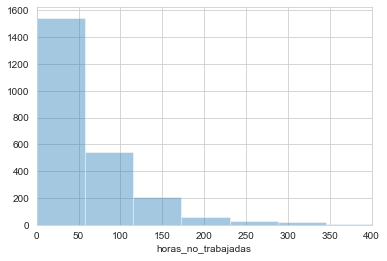

In [128]:
# histograma de horas no trabajadas
sns.distplot(dff['horas_no_trabajadas'], kde = False)
plt.xlim(0,400)

Es de resaltar que la mayoria de trabadores estan entre las 0 y 50 horas no trabajadas (mas de 1400 trabajadores).

(0.0, 700.0)

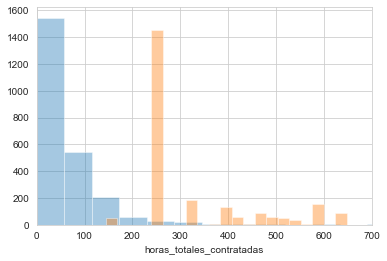

In [129]:
#horas contratadas en amarillo y horas no trabajadas en azul
fig, ax = plt.subplots()
for a in [dff['horas_no_trabajadas'],dff['horas_totales_contratadas']]:
    sns.distplot(a, ax=ax, kde=False)
ax.set_xlim([0, 700])

Para la mayoria de los trabajadores las horas contratadas estan en el rango aproximado de 250-300 horas no trabajadas.

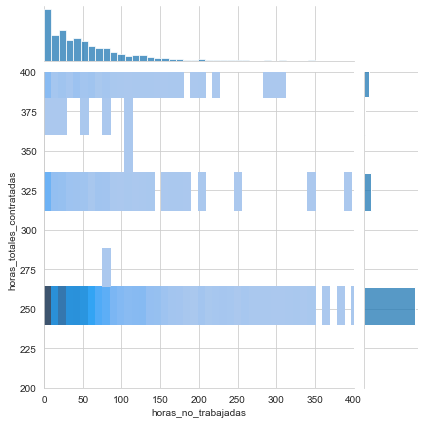

In [169]:
#distribucion unida de las variables horas no trabajadas y horas totales contratadas
sns.jointplot(x="horas_no_trabajadas", y="horas_totales_contratadas", data=dff, kind='hist', xlim={0,400}, ylim={200,400})

La distribucion bivariada de horas contradas y horas no trabajadas nos muestra como en efecto hay una mayor densidad de puntos entre las 0-50 horas no trabajadas y entre las 240 y 260 horas contratadas aproximadamente, lo que implica que una parte considerable de los trabajadores se encuentran en esta area. 

In [182]:
tmp = dff.groupby('Descripcion').mean().sort_values(by='horas_no_trabajadas', ascending=False)

<AxesSubplot:xlabel='horas_no_trabajadas', ylabel='Descripcion'>

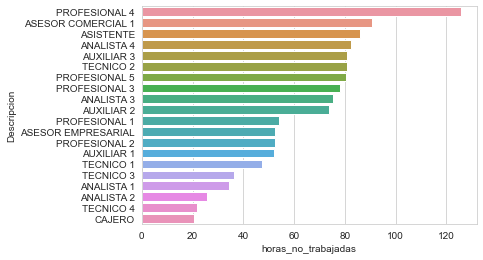

In [187]:
#horas no trabajadas en relacion al cargo.
sns.barplot(y=tmp.index, x="horas_no_trabajadas", data=tmp, ci=None)

Se nota que el cargo con la mayor media de horas no trabajas son los 'PROFESIONALES 4', en contraste los cargos con menos horas no trabajadas son los 'CAJEROS' y 'TECNICOS 4'. Existe un rango en el medio de la grafica con una media de horas no trabajadas mayor a 80, es importante verificar que esta pasando con estos cargos, en particular que horas corresponden a horas de ausentismo y que horas corresponden a horas de incapacidad para tomar los correctivos necesarios.

In [188]:
tmp1 = dff.groupby('Descripcion').mean().sort_values(by='horas_totales_contratadas', ascending=False)

<AxesSubplot:xlabel='horas_totales_contratadas', ylabel='Descripcion'>

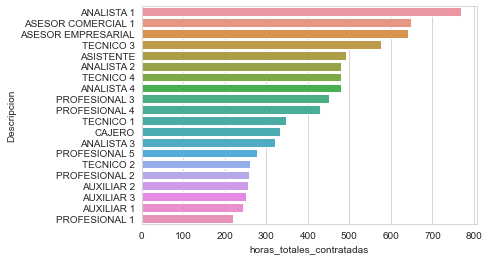

In [189]:
sns.barplot(y=tmp1.index, x="horas_totales_contratadas", data=tmp1, ci = None)

In [190]:
tmp1

,ID colaborador,horas_no_trabajadas,horas_totales_contratadas
Descripcion,,,
ANALISTA 1,100866.313725,34.469608,768.000000
ASESOR COMERCIAL 1,101286.884615,90.767308,647.384615
ASESOR EMPRESARIAL,101666.800000,52.323750,640.000000
TECNICO 3,101462.777778,36.406667,576.000000
ASISTENTE,101314.107438,86.068595,490.909091
ANALISTA 2,100900.857143,25.500000,480.000000
TECNICO 4,101502.583333,21.665000,480.000000
ANALISTA 4,101359.100000,82.450000,480.000000
PROFESIONAL 3,101563.196676,78.084709,449.883657


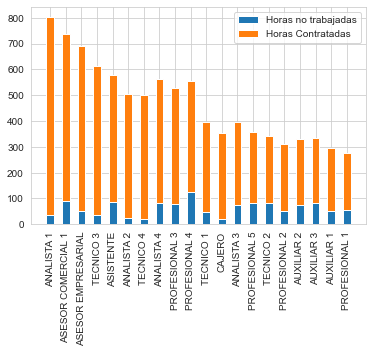

In [202]:
fig, ax = plt.subplots()
ax.bar(tmp1.index, tmp1.horas_no_trabajadas, 0.5, label='Horas no trabajadas')
ax.bar(tmp1.index, tmp1.horas_totales_contratadas, 0.5, bottom=tmp1.horas_no_trabajadas, label='Horas Contratadas')
plt.xticks(rotation=90)
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.legend()
plt.show()

En el caso de las horas totales contratadas cabe notar que el cargo con mayor numero de horas contratadas corresponde al cargo de Analista 1, y el de menor numero de horas contratadas corresponde a profesional 1. Otro grupo con alto numero de horas contratadas corresponde al grupo de asesor empresarial, analista 4 y técnico 3. Valdría la pena evaluar este alto numero de horas contratadas en relación al beneficio que estos profesionales aportan a la empresa.

En relacion a las horas no trabajadas el mayor numero se presenta para PROFESIONAL 4, sin embargo si se tiene hace la comparacion entre el numero de horas contratadas y el nuemero de horas no trabajadas existe una mayor proporcion en el cargo de AUXILIAR 3 y TECNICO 2 implicando que existe una gran cantidad de horas no trabajadas en relacion a las horas contratadas, estando cerca en esta proporcion los cargos de PROFESIONAL 4 y 5.

In [208]:
tmp1['razon'] = tmp1.horas_no_trabajadas/tmp1.horas_totales_contratadas
tmp1.sort_values('razon', ascending=False)

,ID colaborador,horas_no_trabajadas,horas_totales_contratadas,razon
Descripcion,,,,
AUXILIAR 3,101155.152174,80.903261,251.391304,0.321822
TECNICO 2,101575.418803,80.764957,259.692308,0.311003
PROFESIONAL 4,101489.710843,125.670482,428.385542,0.293358
PROFESIONAL 5,101378.553846,80.412692,276.276923,0.291058
AUXILIAR 2,101220.200730,73.632299,256.072993,0.287544
PROFESIONAL 1,100778.803371,54.259775,219.685393,0.246989
ANALISTA 3,101790.764706,75.350000,320.000000,0.235469
AUXILIAR 1,100877.429501,52.247679,244.451193,0.213735
PROFESIONAL 2,101314.467593,52.300278,258.166667,0.202583


---

**Este ejercicio es parte de una prueba 'técnica' realizada por cierta empresa en la ciudad de Bogotá, CO. Es una prueba enfocada a probar las habilidades de sus candidatos a analistas senior, sin embargo también es usada para probar las habilidades de sus candidatos junior, con la escusa de hacer un test a las habilidades del candidato. La realidad es que se usa para contratar analistas junior, que tengan habilidades cercanas a senior y no pagarles el salario que merecen.**